In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_2015=pd.read_csv('input/2015.csv')
data_2016=pd.read_csv('input/2016.csv')
data_2017=pd.read_csv('input/2017.csv')

In [3]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 1*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

In [4]:
data_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


<Figure size 720x432 with 0 Axes>

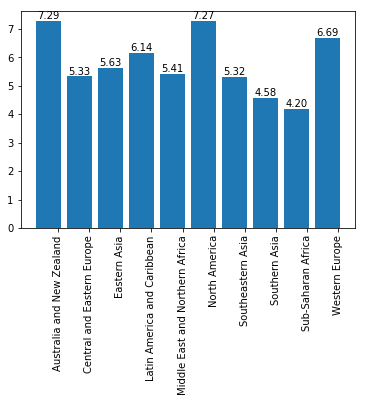

In [5]:
#happiness average score by region

def region_split(data):
    regions=[]
    scores=[]
    for i in np.unique(data['Region']):
        temp_data=data[data_2015['Region']==i]
        scores.append(temp_data.mean()['Happiness Score'])
        regions.append(i)
    return regions,scores

regions,scores=region_split(data_2015)
plt.figure(figsize=(10,6))    
f,ax=plt.subplots()    
p=ax.bar(np.arange(0,len(regions),1),scores)
ax.set_xticks(np.arange(0,len(regions)) +0.65/2) 
ax.set_xticklabels(regions,rotation='vertical')
autolabel(p)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

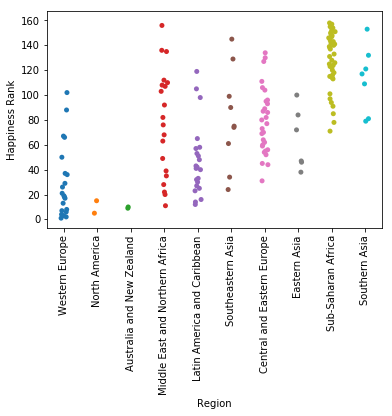

In [6]:
# s
g = sns.stripplot(x="Region", y="Happiness Rank", data=data_2015,jitter=True)
plt.xticks(rotation=90)

In [7]:
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


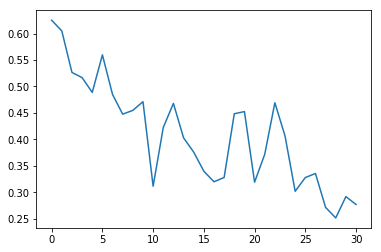

In [8]:
#freedom and happiness

j=0
p=[]
ans=0.0
for i in data_2017['Freedom']:
    j+=1
    ans+=i
    if j==5:
        p.append(ans/5.0)
        j=0
        ans=0
plt.plot(p)
plt.show()

#most happy countries gives more freedom to their citizens but in last we can see some rise in Freedom  

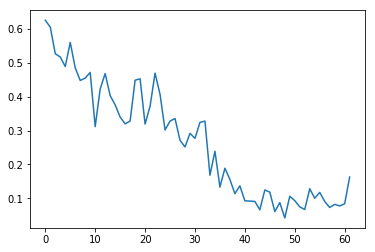

In [9]:
#corruption and happiness
import matplotlib.mlab as mlab

for i in data_2017['Trust..Government.Corruption.']:
    j+=1
    ans+=i
    if j==5:
        p.append(ans/5.0)
        j=0
        ans=0
plt.plot(p)
plt.show()


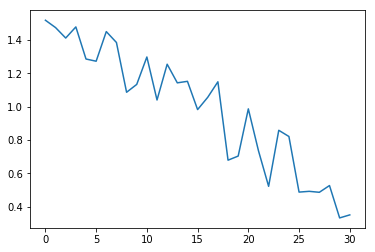

In [10]:
#GDP and happiness

j=0
p=[]
ans=0.0
for i in data_2017['Economy..GDP.per.Capita.']:
    j+=1
    ans+=i
    if j==5:
        p.append(ans/5.0)
        j=0
        ans=0
plt.plot(p)
plt.show()

#lower the happiness lower the GDP

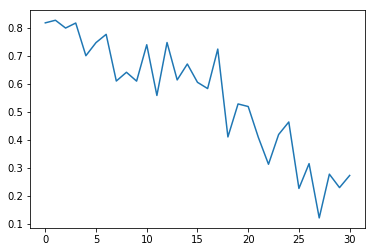

In [11]:
#Health and happiness

j=0
p=[]
ans=0.0
for i in data_2017['Health..Life.Expectancy.']:
    j+=1
    ans+=i
    if j==5:
        p.append(ans/5.0)
        j=0
        ans=0
plt.plot(p)
plt.show()

#Happiness is directly related to our Health so be happy 

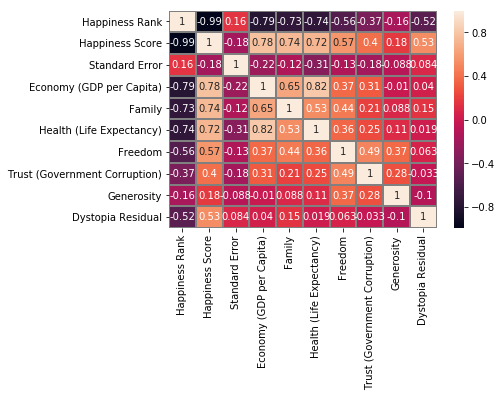

In [12]:
sns.heatmap(data_2015.corr(),linewidths=1,linecolor='grey',annot=True)

In [13]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


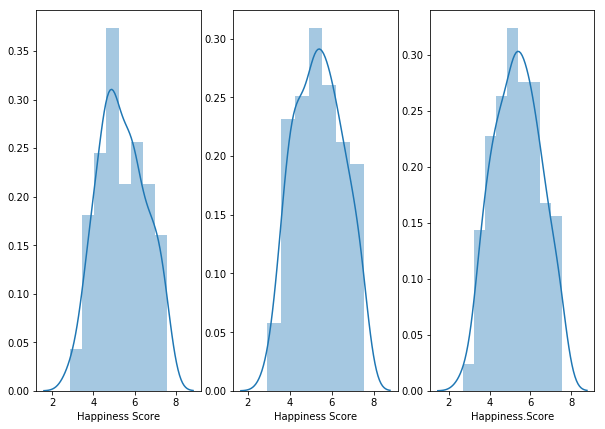

In [14]:
#happ
fig,axes= plt.subplots(nrows=1,ncols=3,figsize=(10,7))
sns.distplot(data_2015['Happiness Score'],ax=axes[0],kde=True)
sns.distplot(data_2016['Happiness Score'],ax=axes[1],kde=True)
sns.distplot(data_2017['Happiness.Score'],ax=axes[2],kde=True)
plt.show()

In [15]:
data_2015['Year']=pd.Series([2015 for i in range(data_2015.shape[0])])
data_2016['Year']=pd.Series([2016 for i in range(data_2016.shape[0])])

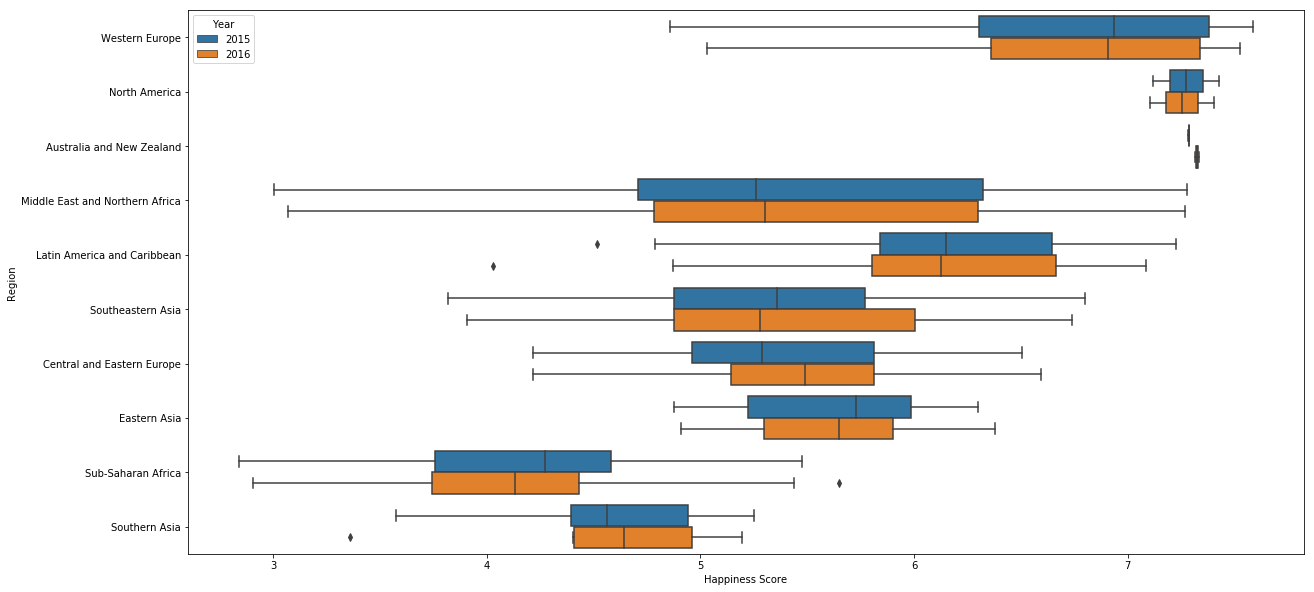

In [16]:
fig ,axes=plt.subplots(figsize=(20,10))
result=pd.concat([data_2015[['Region','Happiness Score','Year']],data_2016[['Region','Happiness Score','Year']]])
sns.boxplot(y='Region',x='Happiness Score',data=result,hue='Year')

In [17]:
#simple linear Regression
f='Economy (GDP per Capita)'
mean_gdp=data_2015[f].mean()
mean_happ=data_2015['Happiness Score'].mean()
x=0
y=0
for i in range(data_2015.shape[0]):
    x+=(data_2015[f][i]-mean_gdp)*(data_2015['Happiness Score'][i]-mean_happ)
    y+=(data_2015[f][i]-mean_gdp)**2
b1=x/y
b0=mean_happ-mean_gdp*b1

In [18]:
error=0
for i in range(data_2015.shape[0]):
    pred=b0+b1*data_2015[f][i]
    error+=(pred-data_2015['Happiness Score'][i])**2
    print(pred,data_2015['Happiness Score'][i])
print(error)

6.596586014210663 7.587000000000001
6.387651201842942 7.561
6.43902534192614 7.527
6.735203026896286 7.522
6.44082210589278 7.4270000000000005
6.360877200512881 7.406000000000001
6.447809521318604 7.377999999999999
6.452844896879435 7.364
6.271992839842167 7.2860000000000005
6.456992981592544 7.284
6.2240569517939 7.278
5.61894677591758 7.226
6.4650895105780215 7.2
5.762599164164035 7.187
6.592149559972045 7.119
5.675422838375189 6.983
6.967917233983 6.946000000000001
6.462272362136499 6.94
6.399851450999142 6.937
6.664818680400609 6.901
6.307905936903781 6.867000000000001
6.5158425470678125 6.853
5.815171146891659 6.81
6.874640783616053 6.797999999999999
5.857960748023131 6.7860000000000005
6.444437816097254 6.75
5.954719814967392 6.67
7.248545146846789 6.611000000000001
6.333215908335097 6.575
5.835734112287654 6.574
6.114055068947362 6.505
5.853812663310023 6.485
5.536495273892863 6.477
5.643613461484296 6.455
6.594145964379423 6.4110000000000005
6.227473021557635 6.329
6.1770970836